In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

# import plotly
# import plotly.plotly as py
#plotly.tools.set_credentials_file(username='slee279', api_key='DO9WykAlIOkNO8fzqmqv')


In [2]:
epl_1314 = pd.read_csv('./Data/epl1314.csv')

In [3]:
epl_1314 = epl_1314[['HomeTeam', 'AwayTeam', 'FTHG', 'FTAG']]

# TG = homegoal + awaygoal = total goals scored in a match
epl_1314['TG'] = epl_1314['FTHG'] + epl_1314['FTAG']

In [4]:
# 380 games during epl 13/14 season with Fulltime HomeGoal and AwayGoal
epl_1314 = epl_1314.rename(columns=({'HomeTeam': 'Home', 'AwayTeam': 'Away', 'FTHG': 'HG', 'FTAG': 'AG'}))
epl_1314.head()

,Home,Away,HG,AG,TG
0,Arsenal,Aston Villa,1,3,4
1,Liverpool,Stoke,1,0,1
2,Norwich,Everton,2,2,4
3,Sunderland,Fulham,0,1,1
4,Swansea,Man United,1,4,5


In [5]:
(epl_1314['TG']==0).sum()

27

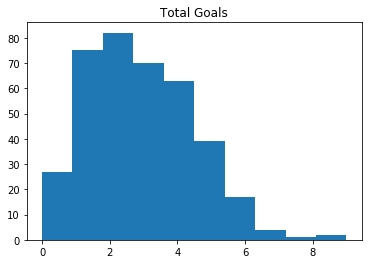

In [6]:
# total goals distribution
plt.hist(epl_1314['TG']);
plt.title("Total Goals");

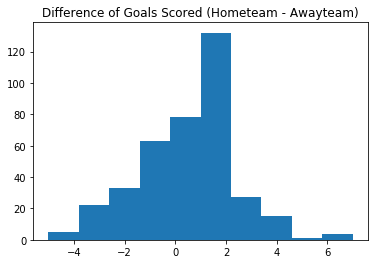

In [7]:
# difference of goal scored
plt.hist(epl_1314['HG'] - epl_1314['AG']);
plt.title("Difference of Goals Scored (Hometeam - Awayteam)");

In [8]:
df = pd.read_csv('./Data/EPL_Table.csv')

In [23]:
seasons = ['13', '14', '15', '16', '17', '18']
data = []
for season in seasons:
    season_data = dict(
            x = df.loc[df['Season'] == int(season),'GA'],
            y = df.loc[df['Season'] == int(season), 'PTS'],
            name = str('Season ' + str(int(season) - 1) + '/' + season + ' GA'),
            mode = 'markers',
            marker = dict(
                    size = 9,
                    color = 'red',
                    opacity = 0.5),
            text = df.loc[df['Season'] == int(season), 'Team'] + '<br>' + 'Season ' +
                str(int(season) - 1) + '/' + season + '<br>' +
                'Rank: ' + df.loc[df['Season'] == int(season), 'Rank'].apply(str) + '<br>'
                'GA: ' + df.loc[df['Season'] == int(season), 'GA'].apply(str),
            type = 'scatter',
            hoverinfo = 'text'
        )
    season_data2 = dict(
            x = df.loc[df['Season'] == int(season),'GF'],
            y = df.loc[df['Season'] == int(season), 'PTS'],
            name = str('Season ' + str(int(season) - 1) + '/' + season + ' GF'),
            mode = 'markers',
            marker = dict(
                size = 9,
                color = 'blue',
                opacity = 0.5),
            text = df.loc[df['Season'] == int(season), 'Team'] + '<br>' + 'Season ' +
                str(int(season) - 1) + '/' + season + '<br>' +
                'Rank: ' + df.loc[df['Season'] == int(season), 'Rank'].apply(str) + '<br>'
                'GF: ' + df.loc[df['Season'] == int(season), 'GF'].apply(str),
            type = 'scatter',
            hoverinfo = 'text'
        )
    data.append(season_data)
    data.append(season_data2)
    
layout = go.Layout(
    title = 'GF/GA vs PTS',
    yaxis = dict(
        title = 'PTS',
        range = [20, 105]
    ),
    xaxis = dict(
        title = 'GF/GA',
        range = [20, 110]
    ),
    hovermode = 'closest',

)

updatemenus = list([
    dict(
         buttons = list([
            dict(label = 'All Seasons',
                 method = 'update',
                 args = [{'visible': [1]}]),
            dict(label = 'Season 12/13',
                 method = 'update',
                 args = [{'visible': [True, True, False, False, False, False, False, False, False, False, False, False]}]),
            dict(label = 'Season 13/14',
                 method = 'update',
                 args = [{'visible': [False, False, True, True, False, False, False, False, False, False, False, False]}]),
             dict(label = 'Season 14/15',
                 method = 'update',
                 args = [{'visible': [False, False, False, False, True, True, False, False, False, False, False, False]}]),
             dict(label = 'Season 15/16',
                 method = 'update',
                 args = [{'visible': [False, False, False, False, False, False, True, True, False, False, False, False]}]),
             dict(label = 'Season 16/17',
                 method = 'update',
                 args = [{'visible': [False, False, False, False, False, False, False, False, True, True, False, False]}]),
             dict(label = 'Season 17/18',
                 method = 'update',
                 args = [{'visible': [False, False, False, False, False, False, False, False, False, False, True, True]}]),
            
        ]),
        # direction where the drop-down expands when opened
        direction = 'down',
        # positional arguments
        x = 0.01,
        xanchor = 'left',
        y = 1.05,
        yanchor = 'bottom',
       
    )
])

# assign the list of dictionaries to the layout dictionary
layout['updatemenus'] = updatemenus

fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [119]:
teams = sorted(set(df['Team']))
additional_trace = go.Scatter(x=[15], y=[21], marker=dict(color='white'), showlegend=False, hoverinfo='none')
additional_trace2 = go.Scatter(x=[15], y=[0.9], marker=dict(color='white'), showlegend=False, hoverinfo='none')

data = [additional_trace, additional_trace2]
for team in teams:
    team_data = dict(
            x = df.loc[df['Team'] == team, 'Season'],
            y = df.loc[df['Team'] == team, 'Rank'],
            name = team,
            mode = 'lines+markers',
            marker = dict(
                    size = 9,
                    opacity = 0.5),
            text = df.loc[df['Team'] == team, 'Team'] + '<br>' +
                'Rank: ' + df.loc[df['Team'] == team, 'Rank'].apply(str),
            type = 'scatter',
            hoverinfo = 'text',
            visible = 'legendonly'
        )
    data.append(team_data)

    
layout = go.Layout(
    title = 'Team Performance by Season',
    yaxis = dict(
        title ='Final Rank',
        range = [0.5, 20.5],
        autorange = 'reversed',
        zeroline = False,
        tickvals = [5, 10, 15, 20]

    ),
    xaxis = dict(
        title = 'Season',
        range = [12.8, 19.2],
    ),
    hovermode = 'closest',
    legend = dict(traceorder = 'grouped')

)

fig = go.Figure(data = data, layout = layout)
iplot(fig)

In [104]:
matchday = pd.read_csv('./Data/matchday.csv')

In [117]:
teams = sorted(set(matchday['Team']))
additional_trace = go.Scatter(x=[15], y=[21], marker=dict(color='white'), showlegend=False, hoverinfo='none')
additional_trace2 = go.Scatter(x=[15], y=[0.9], marker=dict(color='white'), showlegend=False, hoverinfo='none')

data = [additional_trace, additional_trace2]
for team in teams:
    team_data = dict(
            x = matchday.loc[matchday['Team'] == team, 'Matchday'],
            y = matchday.loc[matchday['Team'] == team, 'Rank'],
            name = team,
            mode = 'lines+markers',
            text = matchday.loc[matchday['Team'] == team, 'Team'] + '<br>' +
                'Rank: ' + matchday.loc[matchday['Team'] == team, 'Rank'].apply(str),
            marker = dict(
                    size = 9,
                    opacity = 0.5),
            line = dict(width=1.0),
            type = 'scatter',
            hoverinfo = 'text',
        )
    data.append(team_data)

    
layout = go.Layout(
    title = 'Team Standing by Week Season 18/19',
    yaxis = dict(
        title ='Team Standing',
        range = [0.5, 20.5],
        autorange = 'reversed',
        zeroline = False,
        tickvals = [5, 10, 15, 20]
    ),
    xaxis = dict(
        title = 'Matchday (Week)',
        range = [.8, 9.2],
        
    ),
    hovermode = 'closest',
    legend = dict(traceorder = 'grouped')

)

fig = go.Figure(data = data, layout = layout)
iplot(fig)